## It is much simpler version of GCN which is trained on small sithetic graph data which produce output embedings.

In [ ]:
import networkx as nx
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch

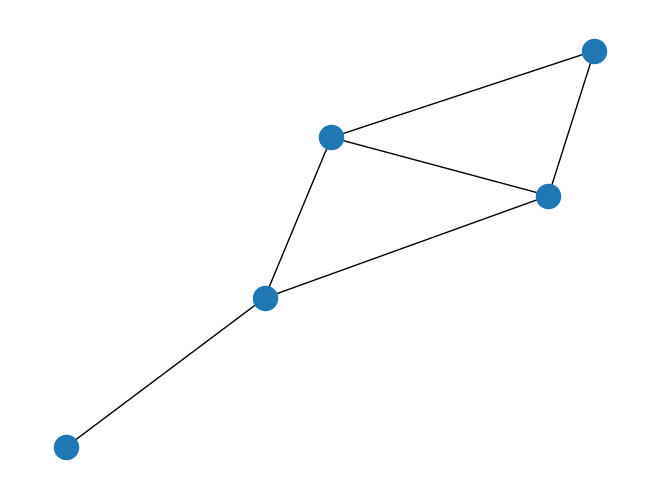

In [ ]:
graph = nx.Graph()

# Adding node, edges and node feature into Graph
graph.add_nodes_from([1,2,3,4,5])
graph.add_edges_from([(1,2), (1,3), (3,5), (4,5), (5,2), (2,3)])
graph.nodes[1]['feature'] = [1,2]
graph.nodes[2]['feature'] = [2,3]
graph.nodes[3]['feature'] = [3,4]
graph.nodes[4]['feature'] = [4,5]
graph.nodes[5]['feature'] = [5,6]

nx.draw(graph)

In [ ]:
# Converting graph to adjacensy matrix
adj_mat = nx.to_numpy_array(graph)
num_nodes = graph.number_of_nodes()

#### Can be calculated Degree Matrix here or later
# degree_mat = np.zeros((num_nodes,num_nodes))
# for i, node in zip(range(num_nodes),graph.nodes()):
#   degree_mat[i, i] = graph.degree()[node]
## OR Self-Loop
degree_mat = np.sum(adj_mat + np.eye(adj_mat.shape[0]), axis=1)

# Calculating feature matrix
feature_vec_len = len(graph.nodes[1]['feature'])
feature_mat = np.zeros((num_nodes, feature_vec_len))
for i in range(num_nodes):
  feature_mat[i] = graph.nodes[i+1]['feature']

In [ ]:
class GCN(nn.Module):
  def __init__(self, in_feature, out_feature) -> None:
    super(GCN, self).__init__()
    self.linear = nn.Linear(in_feature, out_feature)
  def forward(self, adj_mat, feature_mat):
    degree_mat = np.sum(adj_mat, axis=1)

    # Converting into the form D^(1/2)AD^(1/2)
    norm_degree_mat = np.diag(np.power(degree_mat, -0.5))
    spectral_mat = norm_degree_mat.dot(adj_mat).dot(norm_degree_mat)

    # Convert matrices to tensors
    adj_matrix_tensor = torch.FloatTensor(spectral_mat)
    feature_matrix_tensor = torch.FloatTensor(feature_mat)

    inp = torch.matmul(adj_matrix_tensor, feature_matrix_tensor)
    x = self.linear(inp)
    output = F.relu(x)

    return output

In [ ]:
# Creating GCN layer
gcn_layer = GCN(in_feature=2, out_feature=4)
outputs = gcn_layer(adj_mat, feature_mat)

# Embeddings
outputs

tensor([[0.5163, 0.8799, 1.3113, 0.0369],
        [0.7060, 1.2942, 1.6952, 0.1409],
        [0.6567, 1.1841, 1.5995, 0.0864],
        [0.6076, 1.0918, 1.4732, 0.2355],
        [0.8634, 1.6395, 2.0108, 0.2457]], grad_fn=<ReluBackward0>)

In [ ]:
t = torch.tensor([1,2,3])
t.pow(-0.5)

tensor([1.0000, 0.7071, 0.5774])